<a href="https://colab.research.google.com/github/Priyanshi2205/Student-Performance---Machine-Learning/blob/main/Logistic_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Loading the dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/machine learning certification code/Course Project /student-mat-pass-or-fail.csv')

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,1,1,18,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,0
1,1,1,17,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,0
2,1,1,15,1,1,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1
3,1,1,15,1,0,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,1
4,1,1,16,1,0,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,1,0,2,2,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,9,9,0
391,0,0,17,1,1,1,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,14,16,16,1
392,0,0,21,0,0,1,1,1,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7,0
393,0,0,18,0,1,1,3,2,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,10,1


In [ ]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
pass          0
dtype: int64

In [ ]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.883544,0.526582,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,1.448101,2.035443,0.334177,0.129114,0.612658,0.458228,0.508861,0.794937,0.949367,0.832911,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,0.670886
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,0.697505,0.839240,0.743651,0.335751,0.487761,0.498884,0.500555,0.404260,0.219525,0.373528,0.472300,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,0.470487
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,0.000000
50%,1.000000,1.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,1.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,1.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,1.000000


In [ ]:
#There is no null value 
#So no need to handle missing data
#data already encoded

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,1,1,18,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,0
1,1,1,17,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,0
2,1,1,15,1,1,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1
3,1,1,15,1,0,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,1
4,1,1,16,1,0,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,1


In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'pass'],
      dtype='object')

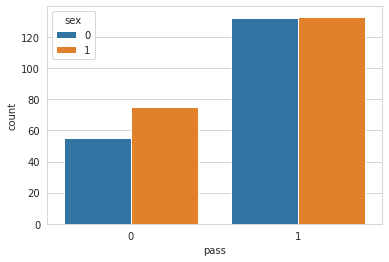

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='pass',hue='sex',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


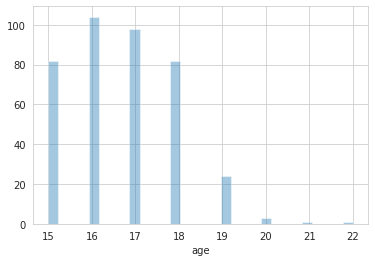

In [ ]:
sns.distplot(df['age'].dropna(),kde=False , bins=30)

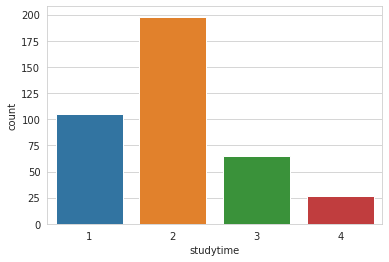

In [ ]:
sns.countplot(x='studytime',data=df)

In [ ]:
#here survived is the independent variable thus it is taken in another variable 
X = df[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3']]
y = df[['pass']]

In [ ]:
#to split the data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

296
296
99
99


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train= mms.fit_transform(X_train)
X_test= mms.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train,y_train)  #training the model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
pred=logmodel.predict(X_test)
pred   #predicted value

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1])

In [ ]:
y_test   #actual value

,pass
280,0
377,1
220,0
326,1
41,1
...,...
95,1
145,1
389,0
51,1


[[18 11]
 [ 2 68]]


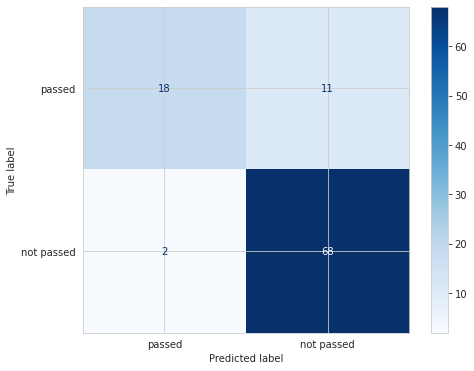

In [ ]:
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred)
print (cm)
target_names = ['passed','not passed']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test, pred))

0.9285714285714286


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.898989898989899


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_test, pred))

0.9027777777777778


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(y_test, pred))

0.9558823529411765


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.90      0.96      0.93        68

    accuracy                           0.90        99
   macro avg       0.90      0.87      0.88        99
weighted avg       0.90      0.90      0.90        99



**Citations :** 
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7
